### Libraries ###

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import os
import cv2

In [12]:
folder_path1 = "HAM10000_images_part_1"
folder_path2 = "HAM10000_images_part_2"

In [13]:
def load_images(folder):
    images = []

    for filename in os.listdir(folder):
        file_path = os.path.join(folder, filename)
        img = load_img(file_path)
        img_normalized = img_to_array(img) / 255.0
        downscaled_images = np.array(cv2.resize(img_normalized, (28,28), interpolation=cv2.INTER_AREA))
        images.append(downscaled_images)
    
    return np.array(images)

In [14]:
images_array1 = load_images(folder_path1)
images_array2 = load_images(folder_path2)
images_array = np.concatenate((images_array1, images_array2), axis=0)

In [17]:
images_csv = images_array.reshape(images_array.shape[0],-1)

In [20]:
pd.DataFrame(images_csv).to_csv("28x28_images.csv", index=False, header=False)

In [34]:
L_df = pd.read_csv("hmnist_8_8_L.csv")
labels = L_df['label'].values
pixel_cols = L_df.columns[:-1]
pixels = L_df[pixel_cols].values
images = pixels.reshape(-1, 8, 8)
plt.imshow(images[0])

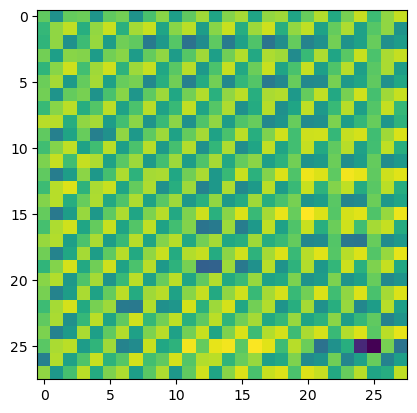

In [40]:
RGB_28_df = pd.read_csv("hmnist_28_28_RGB.csv")
labels = RGB_28_df['label'].values
pixel_cols = RGB_28_df.columns[:-1]
pixels = RGB_28_df[pixel_cols].values
images = pixels.reshape(-1, 28, 28)
plt.imshow(images[0])